In [8]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("D:/class/diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [6]:
# 데이터 확인
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [7]:
# 컬렴명 확인
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Text(0.5, 1.0, 'Outcome')

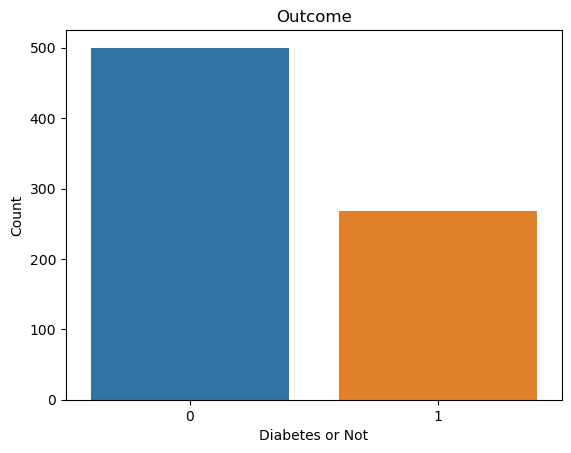

In [10]:
# 레이블 갯수 확인 (그래프)
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("D:/class/diabetes.csv", index_col=0)
sns.countplot(data = df, x="Outcome")
plt.xlabel("Diabetes or Not")
plt.ylabel("Count")
plt.title("Outcome")

In [11]:
# 레이블 갯수 확인 (숫자)
df = pd.read_csv("D:/class/diabetes.csv", index_col=0)
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [12]:
# 결측치 확인
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_7680\3113880567.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Glucose'], kde=True, hist=False, ax=ax1)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Local\Temp\ipykernel_7680\3113880567.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-lev

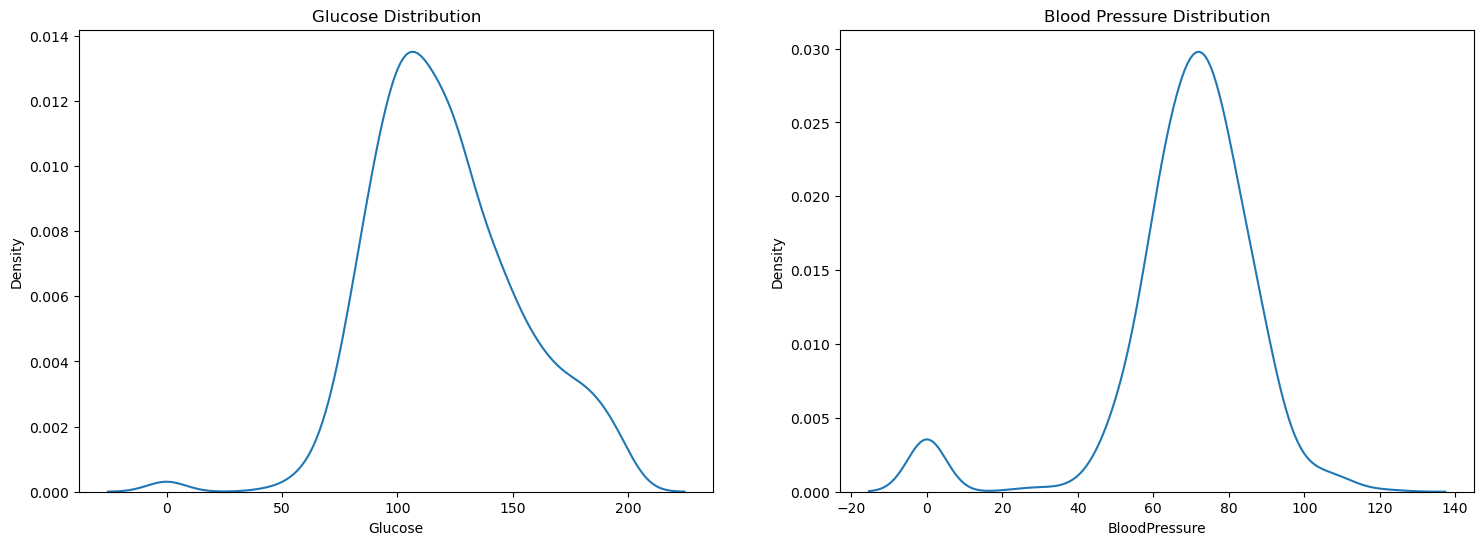

In [18]:
# 컬럼별 히스토그램 확인
# 'mean radius'와'mean texture' 칼럼을 선택


figure = plt.figure(figsize=(18, 6))
ax1 = plt.subplot(1, 2, 1)
sns.distplot(df['Glucose'], kde=True, hist=False, ax=ax1)
ax1.set_title('Glucose Distribution')
ax2 = plt.subplot(1, 2, 2)
sns.distplot(df['BloodPressure'], kde=True, hist=False, ax=ax2)
ax2.set_title('Blood Pressure Distribution')
plt.show()


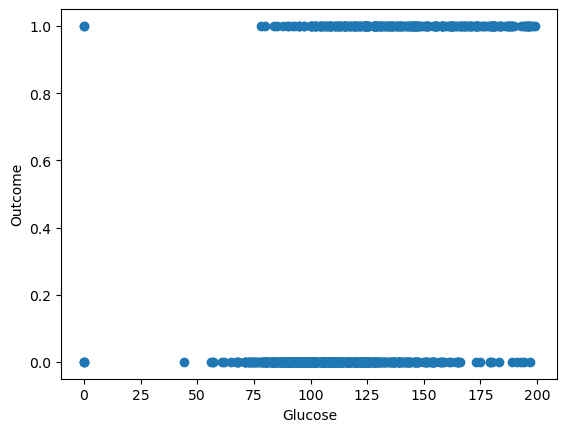

In [21]:
# 산점도 확인

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['Glucose'], df['Outcome'])
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.show()


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

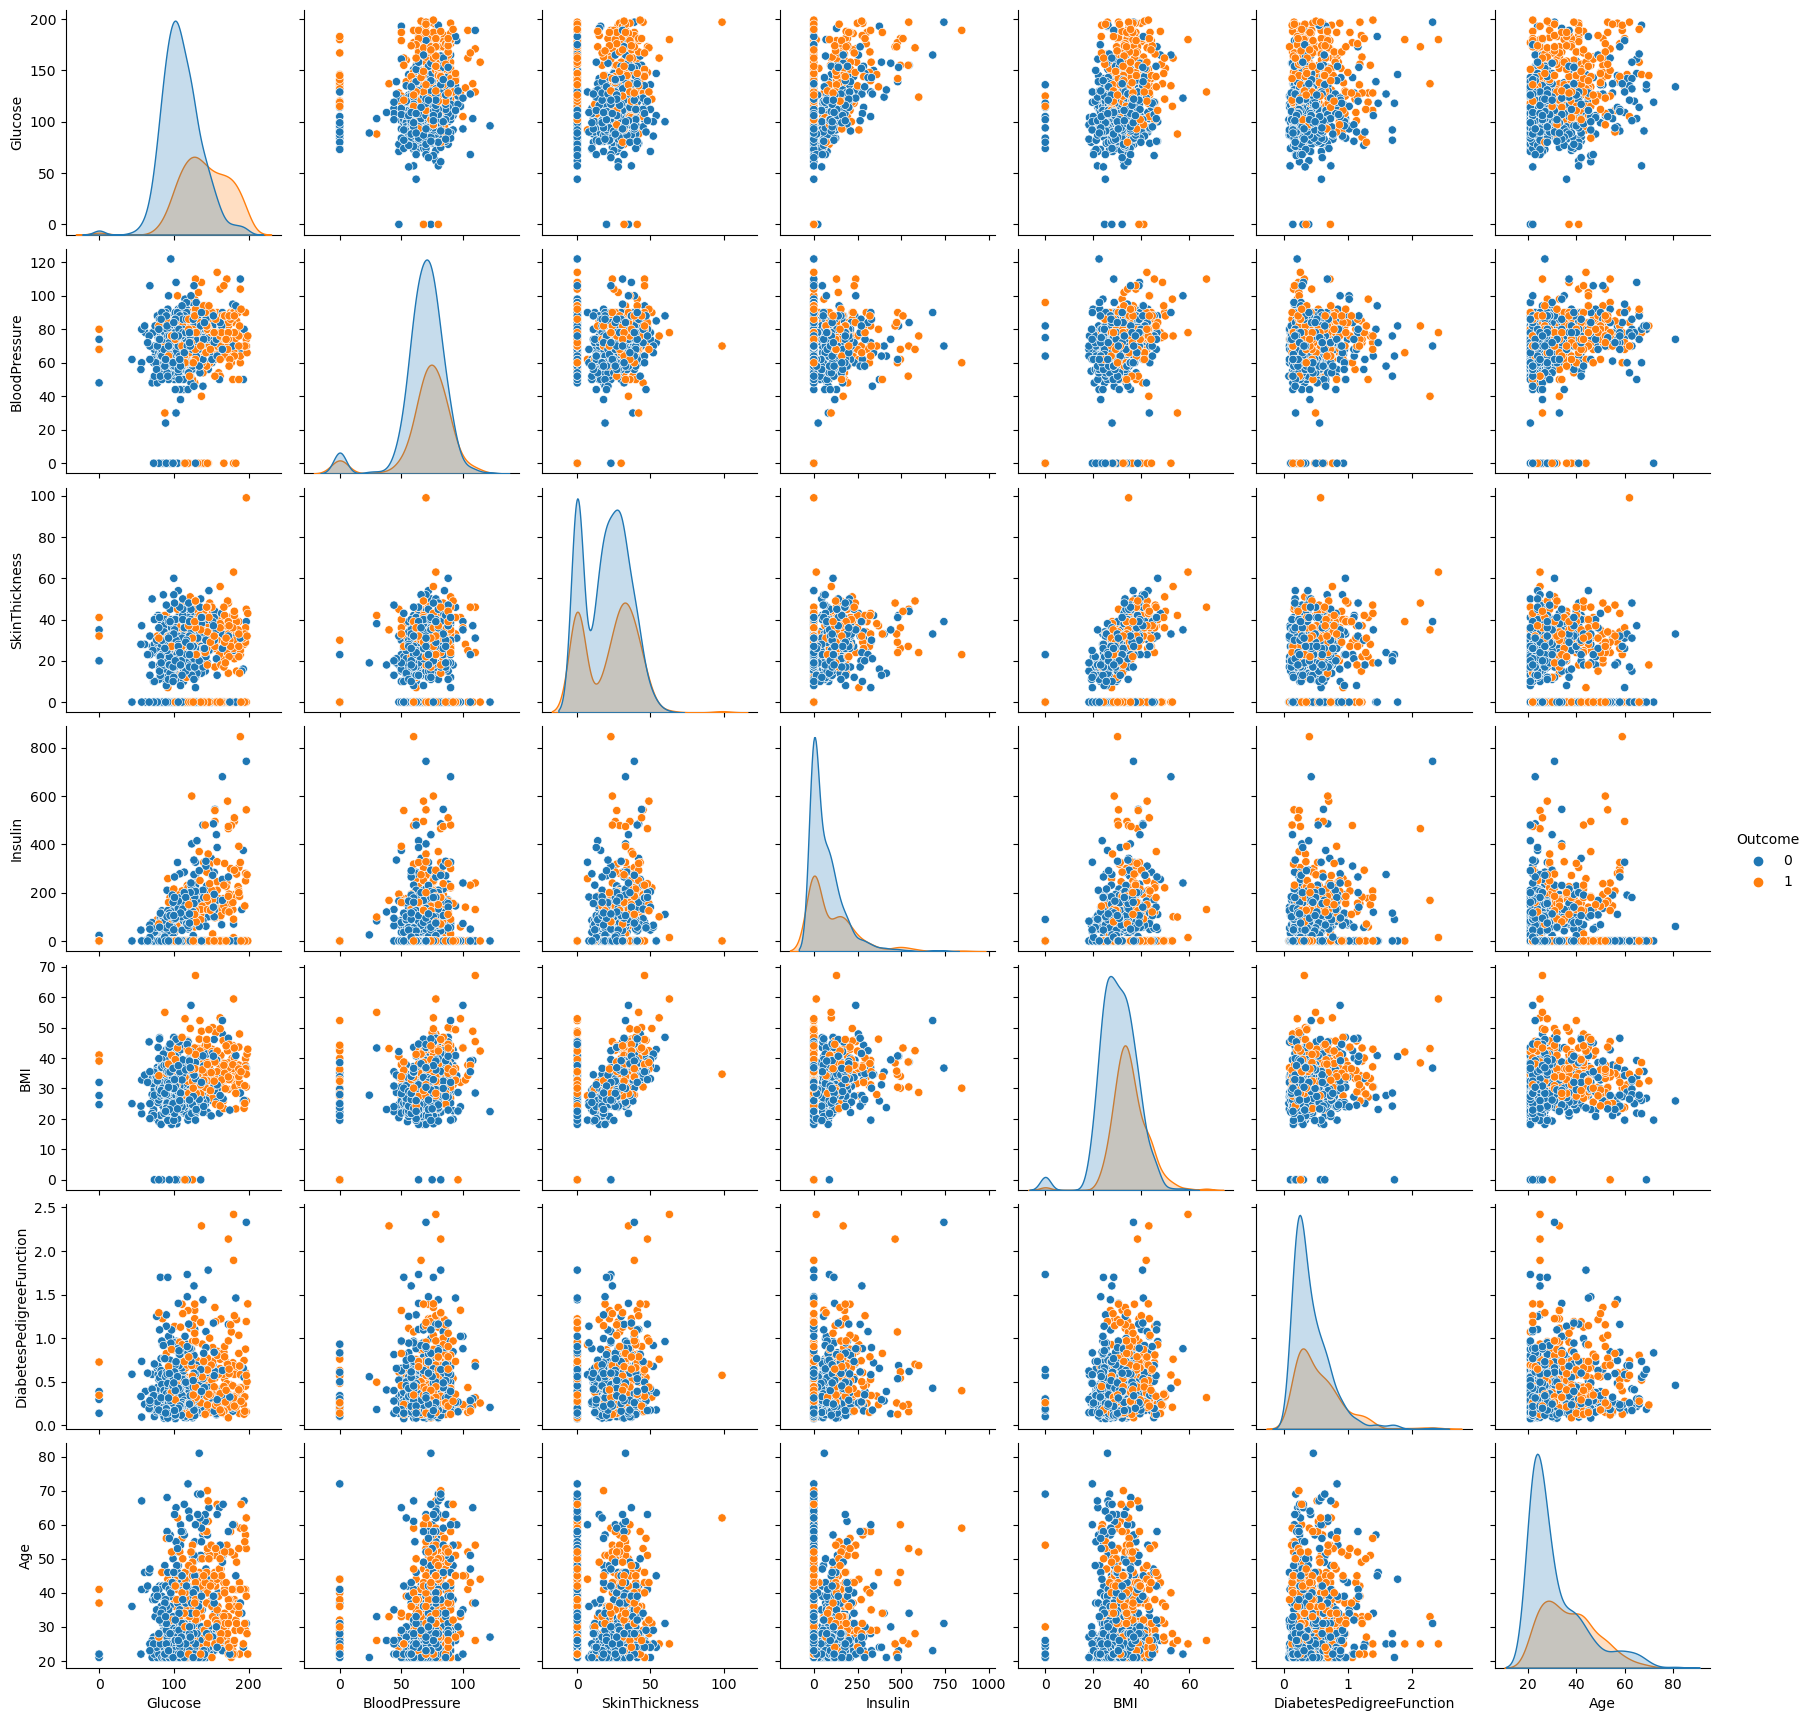

In [23]:
# pairplot를 사용해 각 상관관계 살펴보기

sns.pairplot(df,
             vars=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
             hue='Outcome')
plt.show()

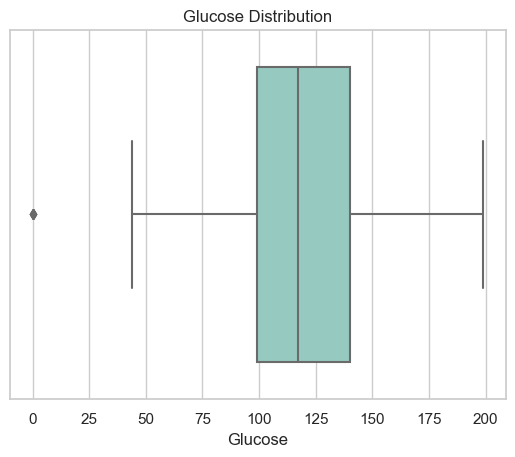

In [25]:
# 특정 칼럼의 범위 확인 및 outlier 확인

sns.set_theme(style="whitegrid")
sns.boxplot(x="Glucose", data=df, palette="Set3")
plt.title("Glucose Distribution")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_7680\2498552643.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


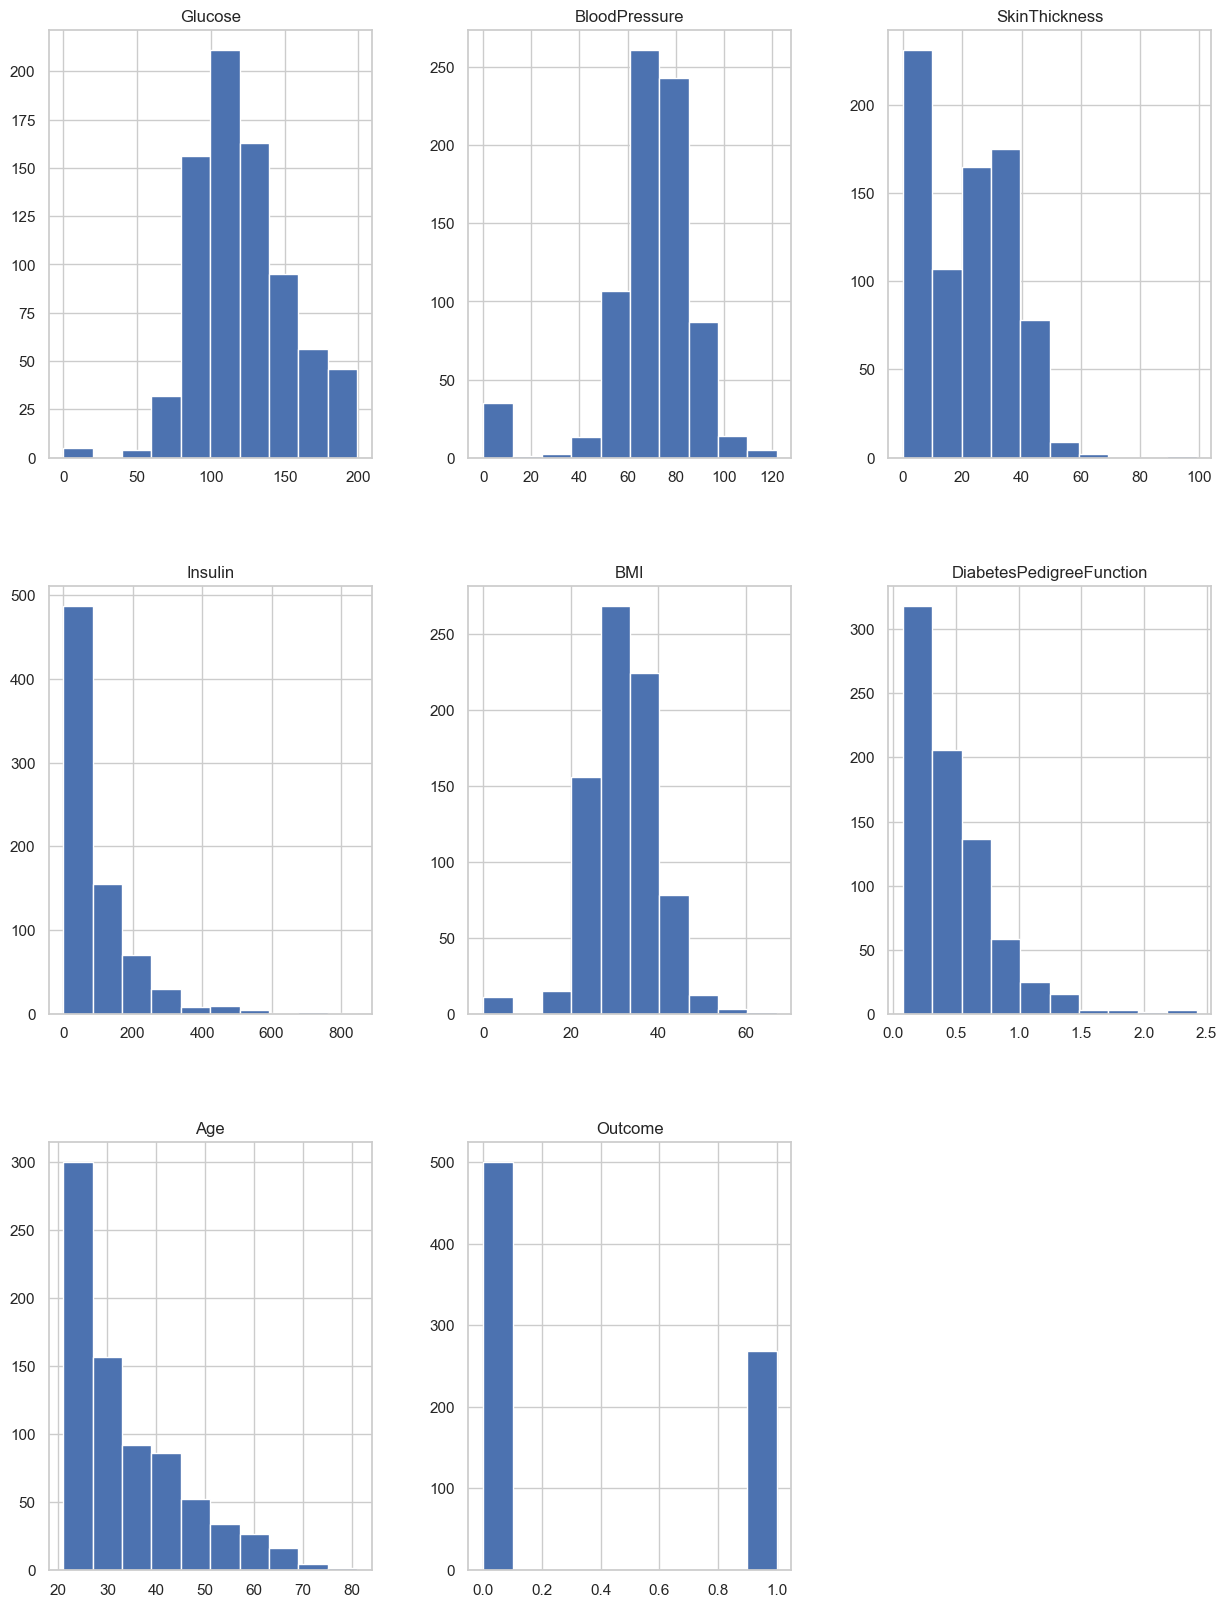

In [26]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [27]:
X=df.drop('Outcome',axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33


In [28]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [31]:
y=df['Outcome']
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [32]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

 ACCURACY OF OTHER ML CLASSIFIERS


In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv("D:/class/diabetes.csv", index_col=0)
X = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [6]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.78125
[[119  11]
 [ 31  31]]


In [7]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.7916666666666666
[[116  14]
 [ 26  36]]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.6875
[[111  19]
 [ 41  21]]


In [9]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.7447916666666666
[[103  27]
 [ 22  40]]


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.7760416666666666
[[114  16]
 [ 27  35]]


In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

df = pd.read_csv("D:/class/diabetes.csv", index_col=0)

# 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age' 컬럼 선택
X_selected = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

# Standardization (표준화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Min-Max Scaling (정규화)
min_max_scaler = MinMaxScaler()
X_scaled_minmax = min_max_scaler.fit_transform(X_selected)
print("Standardized Data:\n", X_scaled)
print("\nMin-Max Scaled Data:\n", X_scaled_minmax)

Standardized Data:
 [[ 0.84832379  0.14964075  0.90726993 ...  0.20401277  0.46849198
   1.4259954 ]
 [-1.12339636 -0.16054575  0.53090156 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.94372388 -0.26394125 -1.28821221 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.00330087  0.14964075  0.15453319 ... -0.73518964 -0.68519336
  -0.27575966]
 [ 0.1597866  -0.47073225 -1.28821221 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.8730192   0.04624525  0.65635768 ... -0.20212881 -0.47378505
  -0.87137393]]

Min-Max Scaled Data:
 [[0.74371859 0.59016393 0.35353535 ... 0.50074516 0.23441503 0.48333333]
 [0.42713568 0.54098361 0.29292929 ... 0.39642325 0.11656704 0.16666667]
 [0.91959799 0.52459016 0.         ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.6080402  0.59016393 0.23232323 ... 0.390462   0.07130658 0.15      ]
 [0.63316583 0.49180328 0.         ... 0.4485842  0.11571307 0.43333333]
 [0.46733668 0.57377049 0.31313131 ... 0.45305514 0.10119556 0.03333333]]
